# Temperature-Analysis

Inspired by a visualization portrayed in "The Visual Display of Quantitative Information" by E. Tufte, I decided to make an analysis of temperature for the city of Mississauga, ON and hopefully get some insights related to global warming

In [2]:
import pandas as pd
import numpy as np
import requests
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Read data

Previously, I have collected temperature data from 2015 t0 2019.
From the api we get daily measurements from the available stations.

- TMAX: Maximim daily temperature
- TMIN: Minimum daily temperature
- TAVG: Average daily temperature.

In [53]:
df = pd.read_csv('data/toronto_temperature.csv')
stations = pd.read_csv('data/weather_stations.csv')

In [54]:
df.head()

,date,datatype,station,attributes,value
0,2019-01-01T00:00:00,TMAX,GHCND:CA006152695,",,C,",2.5
1,2019-01-01T00:00:00,TAVG,GHCND:CA006155750,",,C,",1.3
2,2019-01-01T00:00:00,TMAX,GHCND:CA006155750,",,C,",1.5
3,2019-01-01T00:00:00,TMIN,GHCND:CA006155750,",,C,",1.0
4,2019-01-01T00:00:00,TAVG,GHCND:CA006155875,",,C,",-1.8


In [55]:
df.datatype.unique()

array(['TMAX', 'TAVG', 'TMIN'], dtype=object)

In [56]:
len(df.station.unique())

10

In [57]:
available_stations = df.station.unique()
available_stations

array(['GHCND:CA006152695', 'GHCND:CA006155750', 'GHCND:CA006155875',
       'GHCND:CA006155878', 'GHCND:CA006158355', 'GHCND:CA006158731',
       'GHCND:CA006159123', 'GHCND:CA00615S001', 'GHCND:CA006158751',
       'GHCND:CA00615HMAK'], dtype=object)

In [58]:
stations.loc[stations['id'].isin(available_stations)]

,id,name,latitude,longitude,elevation
43,GHCND:CA006152695,"GEORGETOWN WWTP, CA",43.6333,-79.8833,221.0
78,GHCND:CA006155750,"OAKVILLE TWN, CA",43.5167,-79.6833,168.0
81,GHCND:CA006155875,"OSHAWA, CA",43.9167,-78.8833,140.0
84,GHCND:CA006155878,"OSHAWA WPCP, CA",43.8667,-78.8333,84.0
115,GHCND:CA006158355,"TORONTO CITY, CA",43.6667,-79.4000,113.0
160,GHCND:CA006158731,"TORONTO INTERNATIONAL A, CA",43.6767,-79.6306,173.4
170,GHCND:CA006158751,"TORONTO EAST YORK DUSTAN, CA",43.7000,-79.3333,125.0
198,GHCND:CA006159123,"UXBRIDGE WEST, CA",44.1000,-79.1667,325.0
207,GHCND:CA00615HMAK,"TORONTO BUTTONVILLE A, CA",43.8667,-79.3667,198.0
212,GHCND:CA00615S001,"TORONTO NORTH YORK, CA",43.7833,-79.4667,187.0


We can plot the location of the weather stations, to get a feel of the data collected

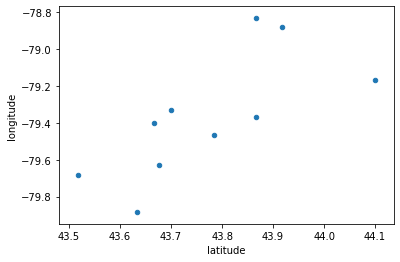

In [59]:
stations.loc[stations['id'].isin(available_stations)].plot(kind='scatter', x='latitude', y='longitude')

In [60]:
df['date'] = pd.to_datetime(df['date'])

In [63]:
mississauga = df.loc[df['station']=='GHCND:CA006158731']

In [65]:
mississauga_pivoted = mississauga.pivot(index='date', columns='datatype', values='value')

In [69]:
def plot_temperature(df):
    fig, ax = plt.subplots(figsize=(20,10))
    ax = df['TMAX'].plot(ax=ax)
    ax = df['TMIN'].plot(ax=ax)
    ax.fill_between(df.index, df['TMIN'].values, df['TMAX'].values)
    ax =  df['TMAX'].rolling('5D').mean().plot(ax=ax, style='r--')
    ax =  df['TMIN'].rolling('5D').mean().plot(ax=ax, style='b--')
    plt.show()

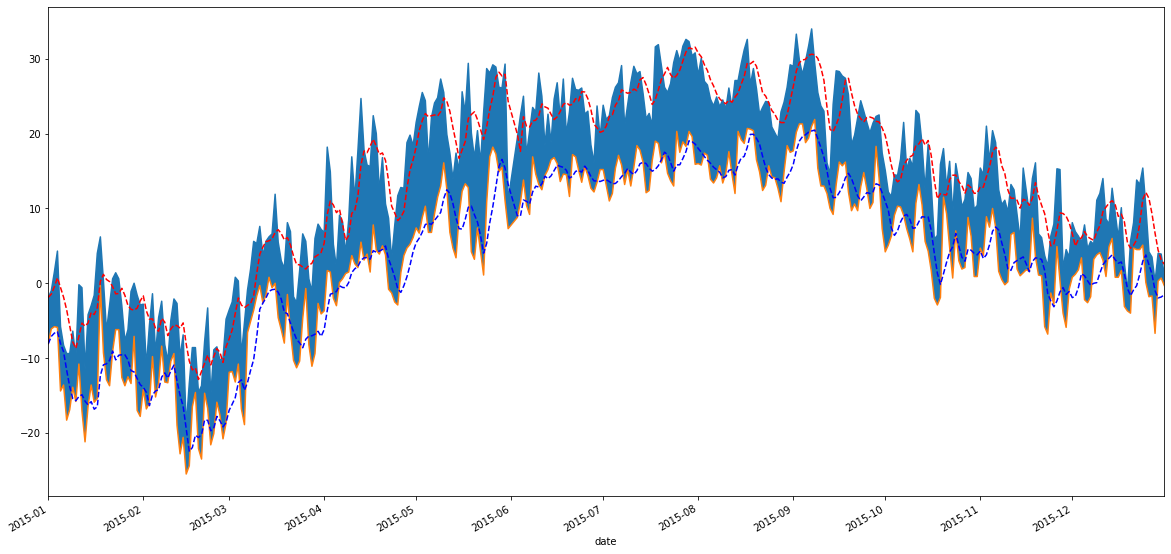

In [71]:
plot_temperature(mississauga_pivoted['2015'])

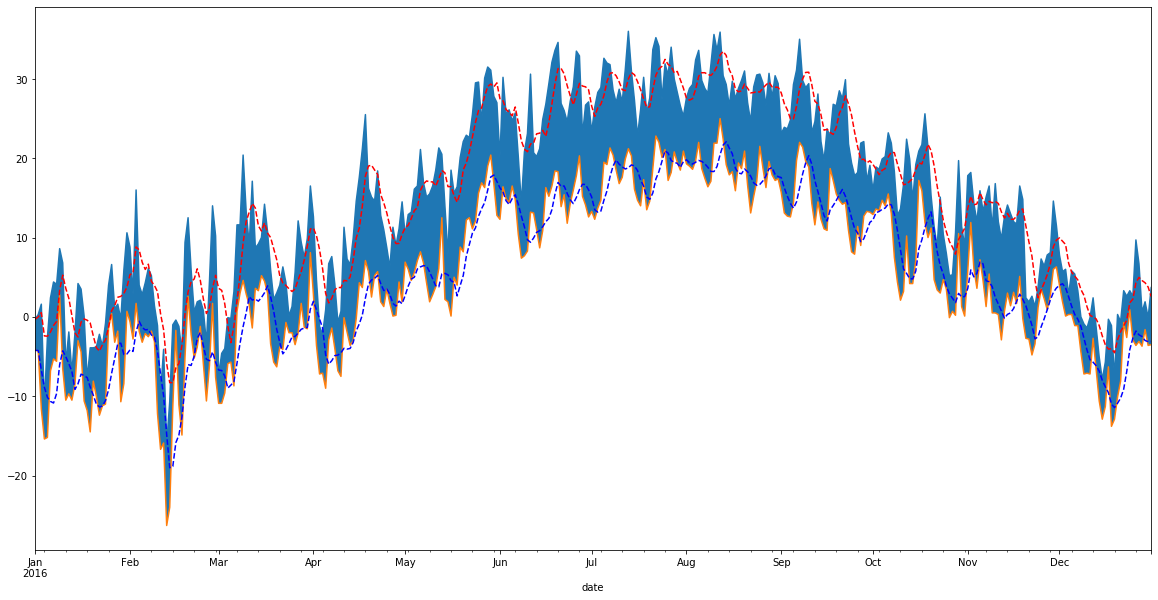

In [72]:
plot_temperature(mississauga_pivoted['2016'])

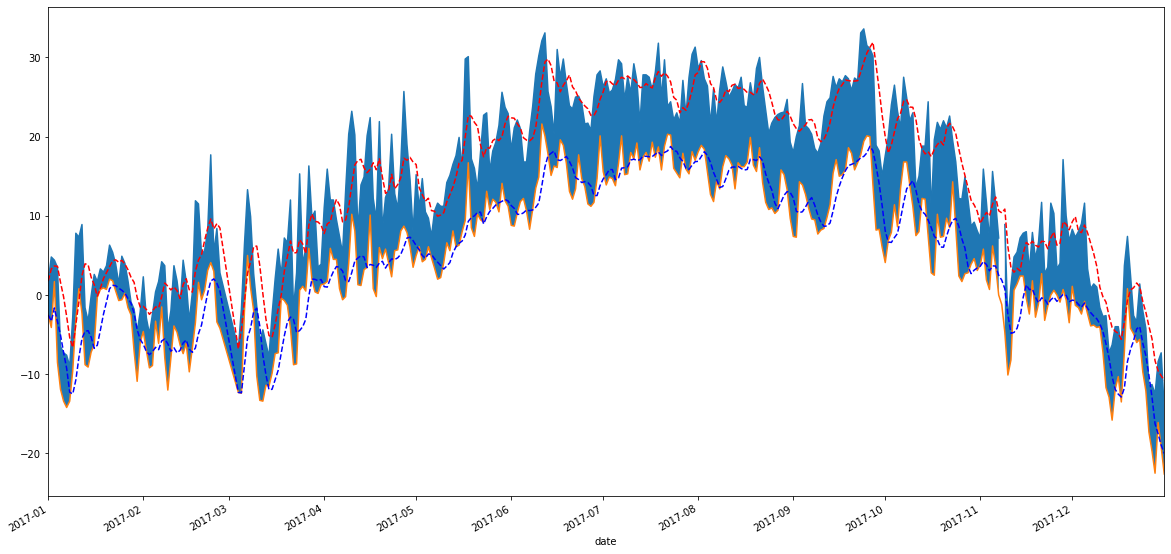

In [73]:
plot_temperature(mississauga_pivoted['2017'])

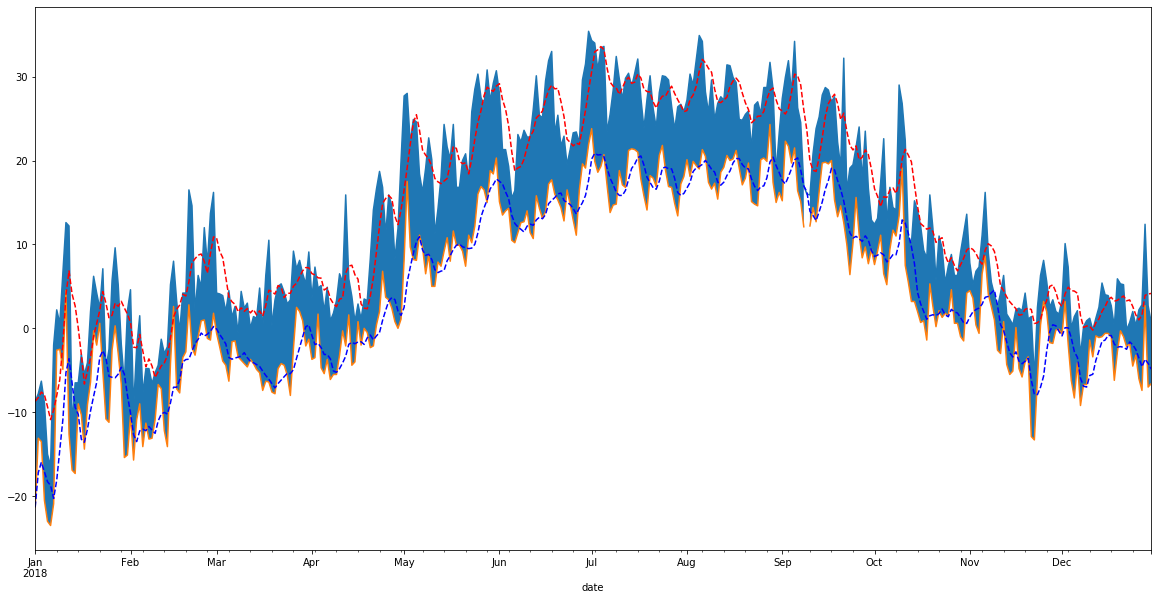

In [74]:
plot_temperature(mississauga_pivoted['2018'])

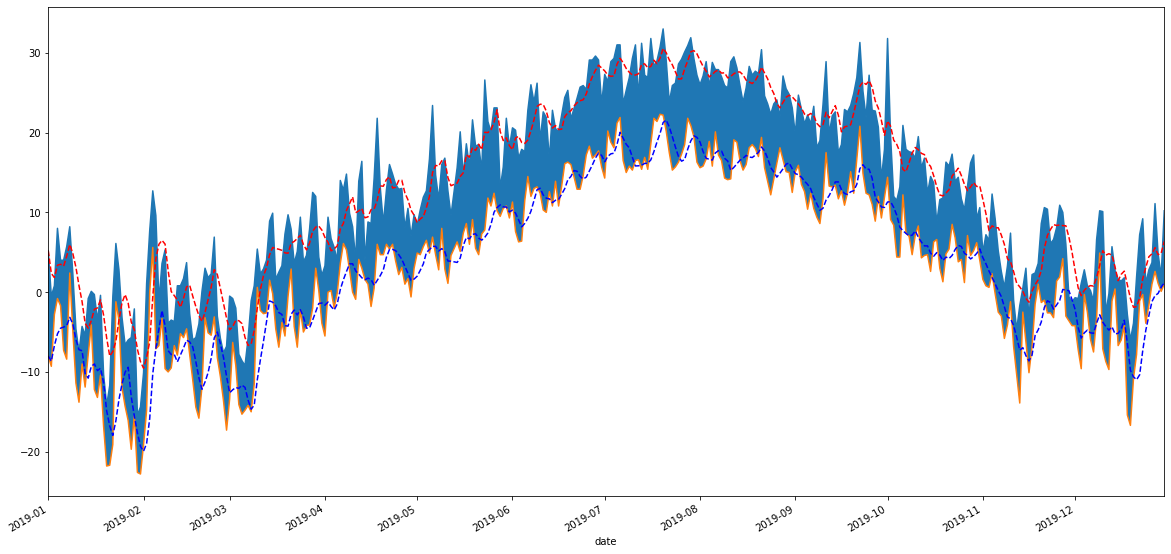

In [75]:
plot_temperature(mississauga_pivoted['2018'])

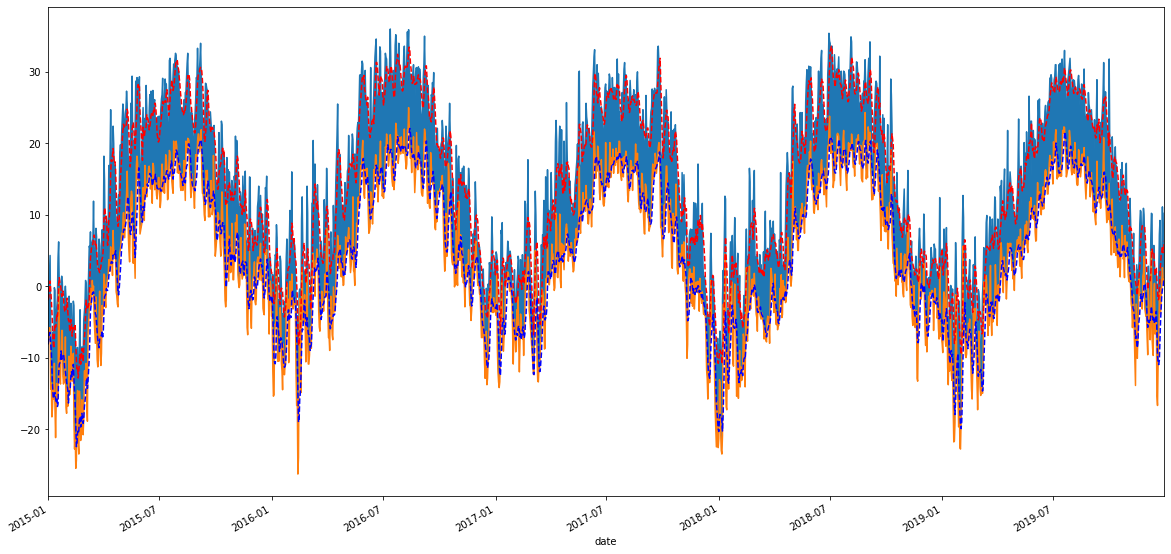

In [76]:
plot_temperature(mississauga_pivoted)

In [82]:
def plot_temperature_avg(df):
    fig, ax = plt.subplots(figsize=(20,10))
    ax =  df['TMAX'].rolling('60D').mean().plot(ax=ax, style='r--')
    ax =  df['TMIN'].rolling('60D').mean().plot(ax=ax, style='b--')
    plt.show()

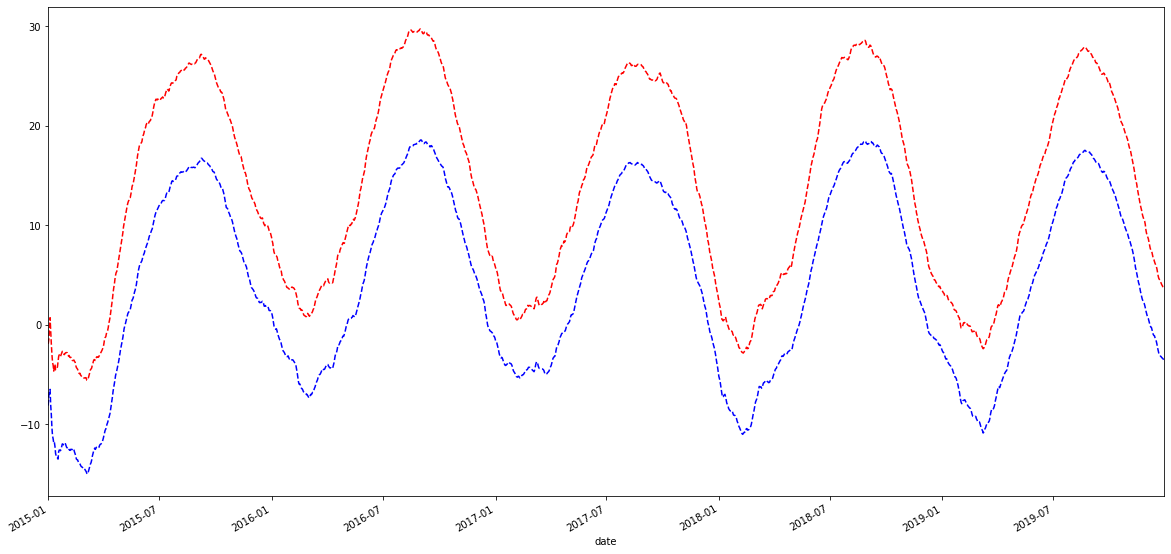

In [83]:
plot_temperature_avg(mississauga_pivoted)